# BMI Regression using Classical Machine Learning Algorithms

## Comparison on Linear Regression, Ridge Regression, Lasso Regression, Random Forest and Decision Tree

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
data = pd.read_csv('data/diabetes.csv')

# Discard rows that contains 0 on BMI as it is very likely to be errorneous input
# MSE of linear regression before discarding: 48.1463
data = data[data['BMI'] > 0].drop('Outcome', axis=1)

X = data.drop(['BMI'], axis=1)
y = data['BMI']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

In [33]:
results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'y_pred': y_pred,
        'CV MSE': cv_mse, 
        'Test MAE': test_mae, 
        'Test MSE': test_mse, 
        'R2': r2
    }

In [34]:
print("Regression Results:")
for name, scores in results.items():
    print(f"{name}:")
    print(f"\tCross-validation MSE: {scores['CV MSE']:.4f}")
    print(f"\tTest MAE: {scores['Test MAE']:.4f}")
    print(f"\tTest MSE: {scores['Test MSE']:.4f}")
    print(f"\tR2 Score: {scores['R2']:.4f}")

Regression Results:
Linear Regression:
	Cross-validation MSE: 41.0051
	Test MAE: 4.4132
	Test MSE: 30.5054
	R2 Score: 0.2487
Ridge Regression:
	Cross-validation MSE: 41.0004
	Test MAE: 4.4134
	Test MSE: 30.5086
	R2 Score: 0.2486
Lasso Regression:
	Cross-validation MSE: 43.3720
	Test MAE: 4.5703
	Test MSE: 33.2136
	R2 Score: 0.1820
Random Forest:
	Cross-validation MSE: 33.9810
	Test MAE: 3.9555
	Test MSE: 25.8069
	R2 Score: 0.3644
Decision Tree:
	Cross-validation MSE: 59.5729
	Test MAE: 5.8401
	Test MSE: 56.7580
	R2 Score: -0.3979


In [35]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"Best performing model: {best_model}")

Best performing model: Random Forest


In [36]:
best_model_instance = models[best_model]
y_pred = best_model_instance.predict(X_test_scaled)
residuals = y_test - y_pred

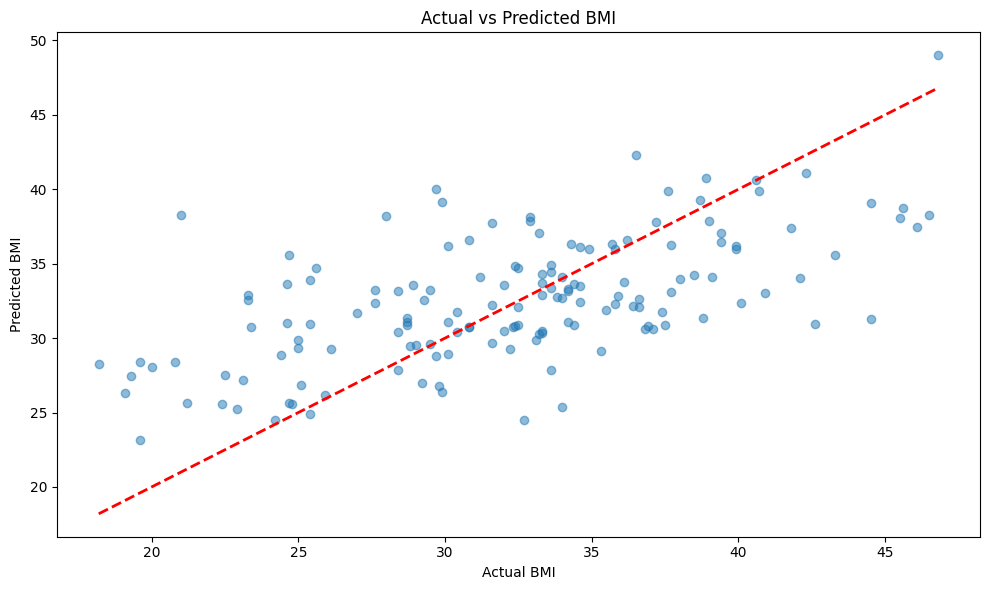

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title("Actual vs Predicted BMI")
plt.tight_layout()
plt.show()
plt.close()

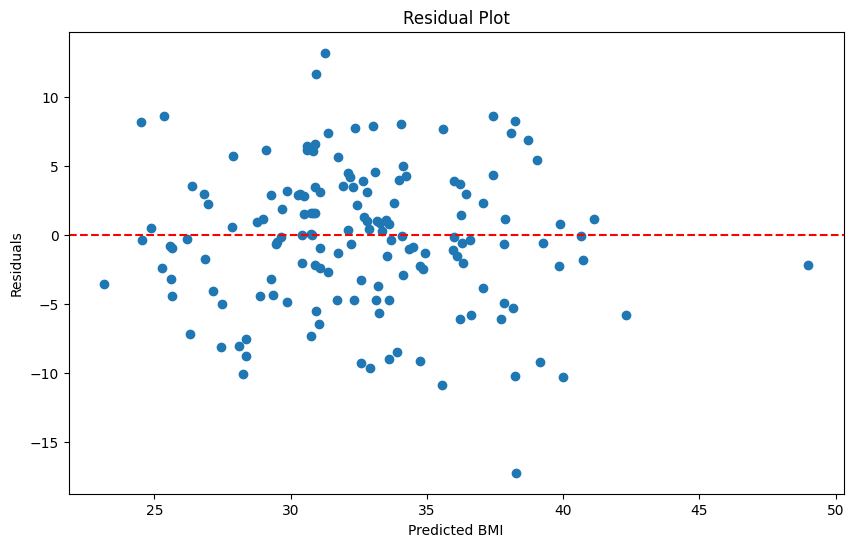

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted BMI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
plt.close()

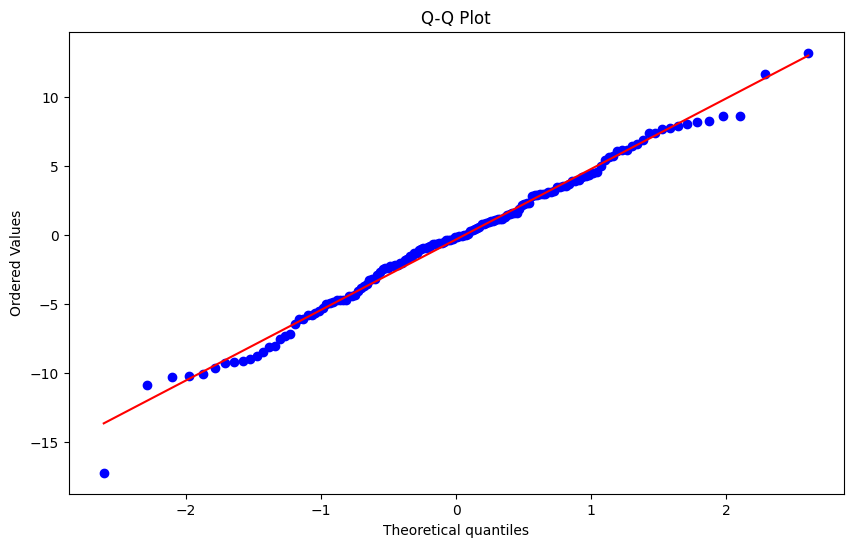

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()
plt.close()

In [40]:
print("Statistical Tests for Residuals:")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Shapiro-Wilk test: {stats.shapiro(residuals)}")

Statistical Tests for Residuals:
Mean of residuals: -0.3218
Shapiro-Wilk test: ShapiroResult(statistic=0.9921091794967651, pvalue=0.5667046308517456)


In [41]:
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                    feature  importance
3             SkinThickness    0.331146
2             BloodPressure    0.167049
1                   Glucose    0.135429
5  DiabetesPedigreeFunction    0.116510
6                       Age    0.108965
0               Pregnancies    0.092873
4                   Insulin    0.048027
